In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<center><h2>Базовые знания.</h2></center>
<p>В OpenCv используется BGR, а не RGB, так что изначально изображения будет в неправильных цветах. Есть несколько способов избавиттся от этого.<br></br>
В функции imread можно передать второй аргумент который будет иметь свойства некоторого фильтра, например IMREAD_GRAYSCALE.</p>

In [2]:
img = cv2.imread( 'img/ball.jpg' )
convRGB = cv2.cvtColor( img, cv2.COLOR_BGR2RGB )

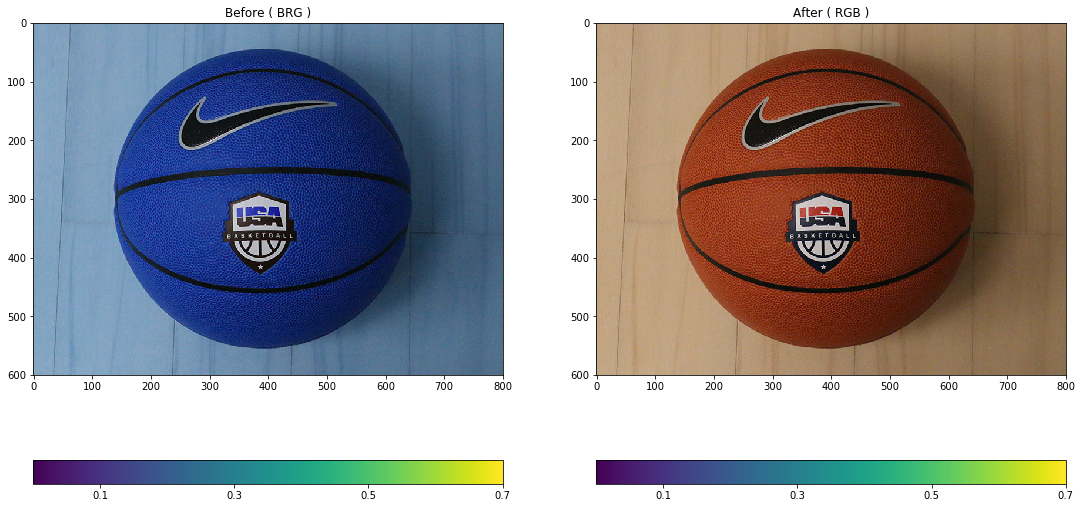

In [3]:

fig = plt.figure()
fig.set_size_inches( 18.5, 10.5 )
a=fig.add_subplot( 1, 2, 1 )
imgplot = plt.imshow( img )
imgplot.set_clim( 0.0, 0.7 )
a.set_title( 'Before ( BRG )' )
plt.colorbar(ticks = [0.1, 0.3, 0.5, 0.7], orientation ='horizontal' )
a=fig.add_subplot( 1, 2, 2 )
imgplot = plt.imshow( convRGB )
imgplot.set_clim( 0.0, 0.7 )
a.set_title( 'After ( RGB )' )
plt.colorbar( ticks = [0.1,0.3,0.5,0.7], orientation='horizontal' )


plt.show()

In [ ]:
# Или спользуем представление самого OpenCv, которое сразу показывает нужные цвета.
cv2.imshow( 'image', img )
cv2.waitKey( 0 )
cv2.destroyAllWindows()

<center><h2>Работаем с захватом видео с вебкамеры</h2></center>

In [4]:
#blue = [ np.array([110,50,50]), np.array([130,255,255])]
def blue( rgbFrame, hsvFrame ):
    lower = np.array([110,50,50])
    upper = np.array([130,255,255])
    mask = cv2.inRange( hsvFrame, lower, upper )
    mask = cv2.erode( mask, None, iterations = 2 )
    mask = cv2.dilate( mask, None, iterations = 2 )
    colorFrame = cv2.bitwise_and( rgbFrame, rgbFrame, mask = mask )
    
    return colorFrame

# Поддерживает 6 выводов одновременно.
def webcam( saveFile = False, *args ):
    cap = cv2.VideoCapture( 0 ) # 0 - номер вебкамеры
    if saveFile:
        fourcc = cv2.VideoWriter_fourcc( *'XVID' )
        out = cv2.VideoWriter( 'video/output.avi', fourcc, 20.0, ( 640, 480 ) )
    
    while( True ):
        ret, frame = cap.read()
        
        hsv = cv2.cvtColor( frame, cv2.COLOR_BGR2HSV )
        #cv2.imshow( 'Original', frame )
        #cv2.imshow( "Only blue ", colorFind( frame, hsv, 2, 2, blue) )
        #cv2.imshow( "Only blue with blur ", cv2.medianBlur( colorFind( frame, hsv, 2, 2, blue), 15) )
        cv2.imshow( "Origin", frame )
        cv2.imshow( "HSV Colors", hsv )
        for each in args:
            cv2.imshow( each.func_name[0].upper() + each.func_name[1:len(each.func_name)], each( frame, hsv ) )
        if cv2.waitKey( 1 ) & 0xFF == ord( 'q' ):
            break
            
    cap.release()
    if saveFile:
        out.release()
    cv2.destroyAllWindows()

In [6]:
webcam( False, blue )

<center><h2>Thresholding</h2><br>
Процесс симплификации изображения с использованием пороговых значений</center>

In [5]:
bookpage = cv2.imread( 'img/bookpage.jpg', )
ret, threshold = cv2.threshold( bookpage, 12, 255, cv2.THRESH_BINARY_INV )

Для полноценного понимания процесса и значения аргументов, проверим работу на одном пикселе изображения

**Parameters:**	

   **src** – Source 8-bit single-channel image.    
   **dst** – Destination image of the same size and the same type as src .  
   **maxValue** – Non-zero value assigned to the pixels for which the condition is   satisfied. See the details below.  
    **adaptiveMethod** – Adaptive thresholding algorithm to use,   ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.  
    thresholdType – Thresholding type that must be either THRESH_BINARY or   THRESH_BINARY_INV .  
    **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold   value for the pixel: 3, 5, 7, and so on.  
    **C** – Constant subtracted from the mean or weighted mean (see the details   below). Normally, it is positive but may be zero or negative as well.  
  
<center>**THRESH_BINARY**</center>  
$$dst( x, y ) = \begin{cases}
   maxValue, if src( x, y ) > T ( x, y)
   \\
    0,       otherwise
   \\
 \end{cases} $$
 
<ul> 
<li><p>For the method ADAPTIVE_THRESH_MEAN_C , the threshold value T(x,y) is a mean of the \texttt{blockSize} \times \texttt{blockSize} neighborhood of (x, y) minus C .</p></li>

<li><p>For the method ADAPTIVE_THRESH_GAUSSIAN_C , the threshold value T(x, y) is a weighted sum (cross-correlation with a Gaussian window) of the \texttt{blockSize} \times \texttt{blockSize} neighborhood of (x, y) minus C . The default sigma (standard deviation) is used for the specified blockSize . See getGaussianKernel() .</p></li>
</ul>



In [6]:
pix = bookpage[0][0]
ret1, thpix = cv2.threshold( pix, 12, 255, cv2.THRESH_BINARY )
ret2, invthpix = cv2.threshold( pix, 12, 255, cv2.THRESH_BINARY_INV )
print( "Input:" + str(pix) )
print( "Thresholded pix:" +  str( thpix.tolist() ) )
print( "Thresholded inv pix:" + str ( invthpix.tolist() ) )


Input:[12 15 20]
Thresholded pix:[[0], [255], [255]]
Thresholded inv pix:[[255], [0], [0]]


In [7]:
# изображения до и после
def view2pict( img1, img2 ):
    fig = plt.figure()
    fig.set_size_inches( 18.5, 10.5 )
    a=fig.add_subplot( 1, 2, 1 )
    imgplot = plt.imshow( img1 )
    a.set_title( ' Original ' )
    a=fig.add_subplot( 1, 2, 2 )
    imgplot = plt.imshow( img2 )
    a.set_title( ' Tresholded ' )
    plt.show()
    

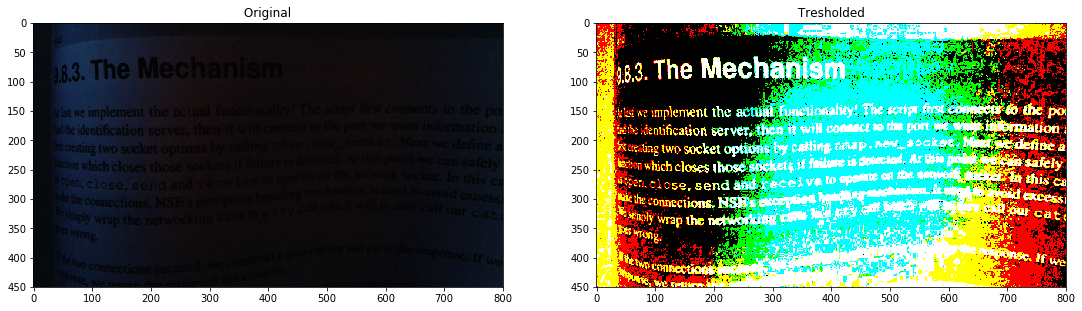

In [8]:
view2pict(  bookpage,  threshold )

In [9]:
# Избавимся от цветов.
graybook = cv2.cvtColor( bookpage, cv2.COLOR_BGR2GRAY )
ret, gray = cv2.threshold( graybook, 12, 255, cv2.THRESH_BINARY_INV )

In [10]:
def viewcv( *args ):
    for index, each in enumerate( args ):
        name = ' Picture№ ' + str( index )
        cv2.imshow( name , each )
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [11]:
# Другой способ. Гораздо более подходяший, 
adaptth = cv2.adaptiveThreshold( graybook, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

In [12]:
viewcv( graybook, gray, adaptth )

In [13]:
def threshold( rgbFrame, hsvFrame ):
    grayscale = cv2.cvtColor( rgbFrame, cv2.COLOR_BGR2GRAY )
    adaptth = cv2.adaptiveThreshold( grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    return adaptth

In [14]:
webcam( False, threshold, blue )